In [1]:
import scanpy as sc

In [8]:
run_id = 'acinar_adm_panin'
adata_hvg = sc.read(f'data/{run_id}.h5ad')
# adata_hvg.uns["decipher"]["run_id"] = run_id

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/acinar_adm_panin.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [6]:
# Normalize total counts per cell
sc.pp.normalize_total(adata_hvg, target_sum=1e4)
# Logarithmize the data
sc.pp.log1p(adata_hvg)


/home/qp2134/miniconda3/envs/fa/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/home/qp2134/miniconda3/envs/fa/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


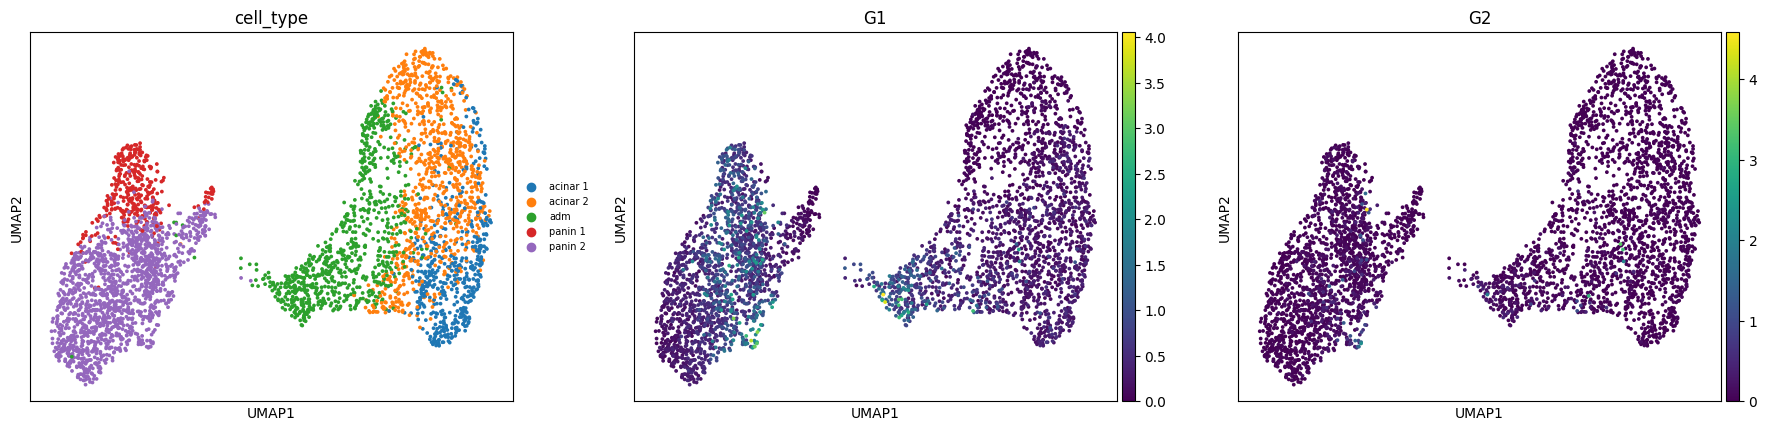

In [4]:
sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver='arpack')
# Compute the neighborhood graph
sc.pp.neighbors(adata_hvg, n_neighbors=20, n_pcs=40)
# Run UMAP
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=['cell_type', 'G1', 'G2'], legend_fontsize=7, save='umap_graph.png')

/home/qp2134/miniconda3/envs/fa/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


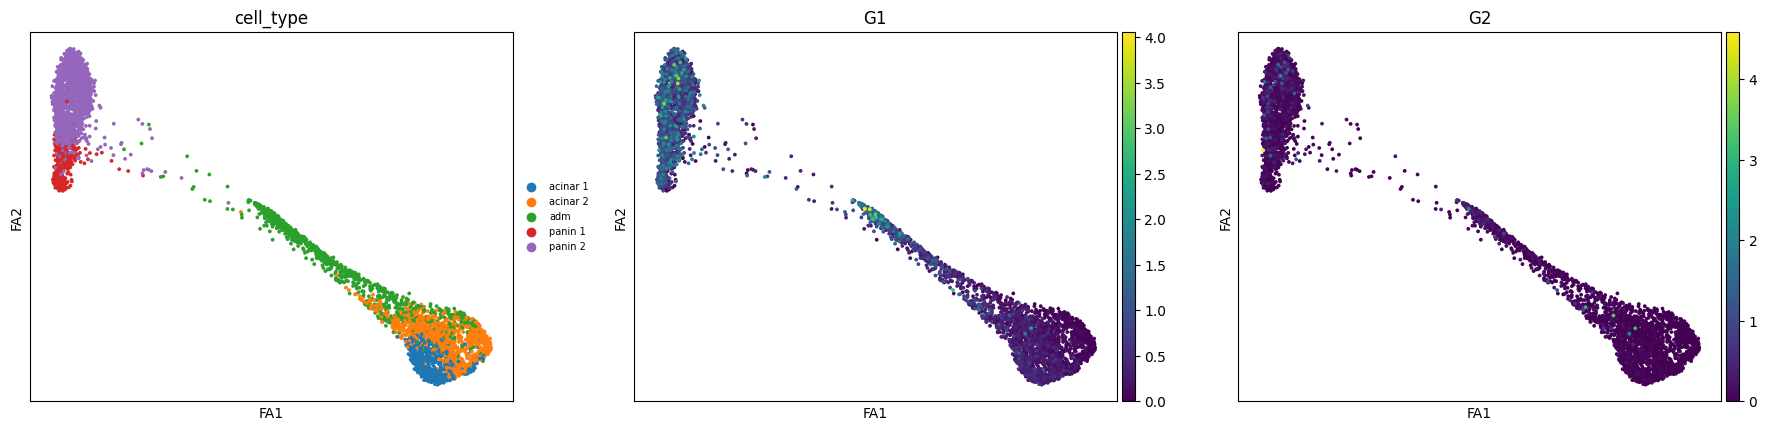

In [7]:
# scanpy graph fa/fr
sc.pp.neighbors(adata_hvg, n_neighbors=20, metric='cosine', use_rep='X')
sc.tl.draw_graph(adata_hvg, layout='fa')
sc.pl.draw_graph(adata_hvg, color=['cell_type', 'G1', 'G2'], legend_fontsize=7, save='scanpy_fa_graph.png')